In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [45]:
df = pd.read_csv('moonDataset.csv')
train_data = df.iloc[:150, :]
test_data = df.iloc[150:, :]

In [46]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [ ]:
bootstrap_datasets = []
for i in range(50):
    X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=150, random_state=i)
    bootstrap_datasets.append((X_bootstrap, y_bootstrap))
error_rates = []
for i in range(50):
    # Train a feedforward network
    model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=i)
    model.fit(bootstrap_datasets[i][0], bootstrap_datasets[i][1])

    # Compute error rate on test dataset
    y_pred = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

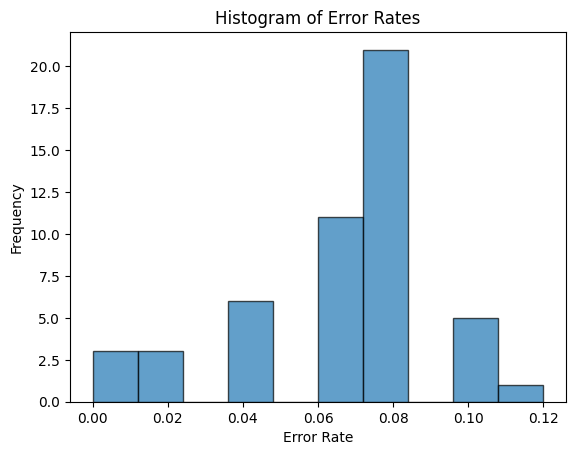

In [ ]:
plt.hist(error_rates, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Error Rates')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('q1.png', dpi=400)

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
ensemble_sizes = [5, 10, 15, 20]
error_rates_bagging = []
for m in ensemble_sizes:
    # Bagging classifier with a decision tree as the base estimator
    bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=m,
        random_state=42
    )
    bagging_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = bagging_model.predict(X_test)
    
    # Calculate error rate
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates_bagging.append(error_rate)

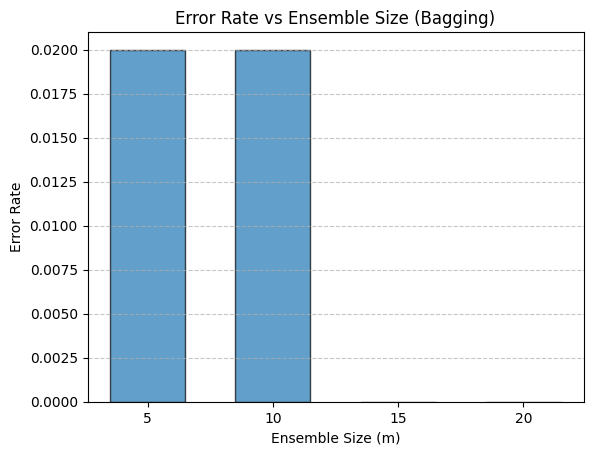

In [66]:
plt.bar(ensemble_sizes, error_rates_bagging, width=3, edgecolor='k', alpha=0.7)
plt.title('Error Rate vs Ensemble Size (Bagging)')
plt.xlabel('Ensemble Size (m)')
plt.ylabel('Error Rate')
plt.xticks(ensemble_sizes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
plt.savefig('q1c.png', dpi=400)